<a href="https://colab.research.google.com/github/tamarasessink/Master_Thesis/blob/master/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tamarasessink/Master_Thesis.git

Cloning into 'Master_Thesis'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 146 (delta 77), reused 86 (delta 34), pack-reused 0
Receiving objects: 100% (146/146), 489.03 KiB | 4.45 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [ ]:

import torch.multiprocessing as mp
print("Number of cpu : ", mp.cpu_count())

Number of cpu :  12


In [3]:
!pip install -U tensorflow==2.9.2
!pip install fastapi==0.90.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 97.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.1.21
    Uninstalling flatbuffers-23.1.21:
      Successfully uninstalled flatbuffers-23.1.21
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully u

In [4]:
!pip install fastapi==0.90.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!pip install -U tensorflow==2.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.7 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing i

In [ ]:
import torch
model = torch.load('/content/drive/MyDrive/checkpoint_0199.pth.tar', map_location='cpu')
print(model)

{'epoch': 200, 'arch': 'resnet50', 'state_dict': OrderedDict([('module.queue', tensor([[ 0.1754,  0.0120,  0.2373,  ..., -0.0143, -0.0732,  0.0803],
        [-0.0169, -0.1075, -0.0609,  ...,  0.0293,  0.0364,  0.0060],
        [ 0.0045,  0.1483, -0.0422,  ...,  0.0360,  0.0889,  0.1925],
        ...,
        [-0.0383, -0.1552,  0.0384,  ...,  0.0388,  0.0537,  0.1211],
        [-0.1201, -0.1051, -0.0991,  ...,  0.1683, -0.0665,  0.0569],
        [ 0.1065, -0.0230,  0.1664,  ...,  0.2027, -0.1606,  0.0505]])), ('module.queue_ptr', tensor([0])), ('module.encoder_q.conv1.weight', tensor([[[[ 7.0230e-02, -4.1660e-02,  4.2025e-02,  ...,  7.0984e-03,
            1.7880e-02,  6.1800e-03],
          [-3.7125e-02,  2.1589e-02, -6.1565e-02,  ...,  2.3484e-02,
           -1.0346e-02,  9.8234e-03],
          [-6.0116e-03, -3.5639e-02,  6.6227e-02,  ...,  2.8408e-03,
           -1.8451e-02,  1.1533e-02],
          ...,
          [ 2.8007e-02, -2.9953e-02, -1.4943e-04,  ...,  7.7149e-03,
           

In [ ]:
import h5py

In [8]:
!python /content/Master_Thesis/main_moco.py \
  --lr 0.03 \
  --batch-size 256 \
  --mlp --moco-t 0.2 --aug-plus --cos \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \


2023-03-06 12:53:39.115596: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Use GPU: 0 for training
=> creating model 'resnet50'
MoCo(
  (encoder_q): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    

In [62]:
!python /content/Master_Thesis/main_lincls.py \
  -a resnet50 \
  --lr 30.0 \
  --batch-size 256 \
  --pretrained /content/checkpoint_0019.pth.tar \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \

2023-03-06 16:21:13.857120: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 16:21:14.043566: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-06 16:21:15.117582: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-06 16:21:15.117697: W tensorflow/compiler/xla/stream_executor

In [61]:
!pip uninstall torchvision
!pip install --upgrade -U torchvision -f https://data.pyg.org/whl/torch-0.14.2+cu117.html


Found existing installation: torchvision 0.14.1+cu116
Uninstalling torchvision-0.14.1+cu116:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/torchvision-0.14.1+cu116.dist-info/*
    /usr/local/lib/python3.8/dist-packages/torchvision.libs/libcudart.a44f4c9b.so.11.0
    /usr/local/lib/python3.8/dist-packages/torchvision.libs/libjpeg.ceea7512.so.62
    /usr/local/lib/python3.8/dist-packages/torchvision.libs/libnvjpeg.5afee195.so.11
    /usr/local/lib/python3.8/dist-packages/torchvision.libs/libpng16.7f72a3c5.so.16
    /usr/local/lib/python3.8/dist-packages/torchvision.libs/libz.1328edc3.so.1
    /usr/local/lib/python3.8/dist-packages/torchvision/*
Proceed (Y/n)? Y
  Successfully uninstalled torchvision-0.14.1+cu116
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-0.14.2+cu117.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 59.3 MB/s eta 0:00:00


NameError: ignored

(5734, 18, 288, 288)


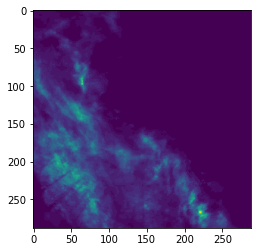

In [ ]:
import pylab as plt
import numpy as np
import h5py
from PIL import Image

f = h5py.File('/content/drive/MyDrive/train_test_2016-2019_input-length_12_img-ahead_6_rain-threshhold_50.h5', "r")
traindir = f['/train/images']
print(traindir.shape)
test = np.reshape(traindir[0][17:], (288,288))
test = test*10000

image = Image.fromarray(np.uint8(test))
image.save("test.jpeg")
image.open("test.jpeg")
plt.imshow(image)

In [ ]:
!git push https://github.com/tamarasessink/Master_Thesis.git

fatal: not a git repository (or any of the parent directories): .git


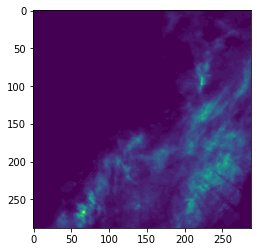

In [ ]:
import torchvision.transforms as transforms
from PIL import Image
# after agmentation
image = Image.fromarray(np.uint8(test))

transform = transforms.RandomHorizontalFlip(p=0.8)
img = transform(image)
plt.imshow(img)

mean and std before normalize:
Mean of the image: tensor([0.0188])
Std of the image: tensor([0.0278])


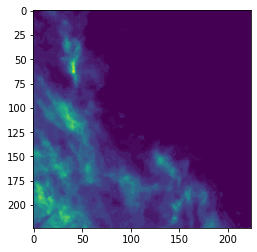

In [ ]:
import torch
# we only have 1 not 3 dimensions per image thus only 1 mean and std
transform = transforms.Compose([
    transforms.ToTensor()
])
# get tensor image
img_tr = transform(image)
# calculate mean and std
mean, std = img_tr.mean([1,2]), img_tr.std([1,2])
# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)


normalize = transforms.Normalize(mean=[0.0188],
                                     std=[0.0278])
augmentation = [transforms.RandomResizedCrop(224, scale=(0.2, 1.)),
            transforms.RandomGrayscale(p=0.2),
            transforms.ColorJitter(0.4, 0.4, 0.4, 0.4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(), normalize]
aug = transforms.Compose(augmentation)
img = aug(image)
test2 =  torch.squeeze(img,0)
plt.imshow(test2)

